<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



# tensor:Multi-dimentional data arrays.
# flow:Numerical computations via graphs.(data flow)
# a flow of tensors which is fundamental to the working of a neural network.     


In [5]:
# Keras is an API designed for human beings, not machines. 
# Keras follows best practices for reducing cognitive load: 
# it offers consistent & simple APIs, it minimizes the number of user actions required for 
# common use cases, and it provides clear & 
# actionable error messages.It also has extensive documentation and developer guides.

In [6]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

# total 70,000 /dataset available from keras function.

In [7]:
len(X_train)

60000

In [8]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

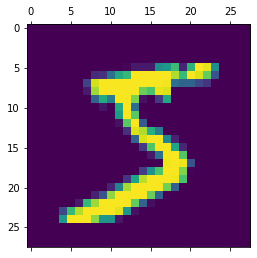

In [11]:
plt.matshow(X_train[0])

In [12]:
y_train[0]

5

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


#flattenend used for converting multi-dimentionl
# array in a linear vector thats means single dimention.

In [16]:
X_train_flattened.shape

(60000, 784)

In [17]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [20]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 2s 885us/step - loss: 0.4712 - accuracy: 0.8754
Epoch 2/6
1875/1875 [==============================] - 2s 881us/step - loss: 0.3033 - accuracy: 0.9151
Epoch 3/6
1875/1875 [==============================] - 2s 870us/step - loss: 0.2830 - accuracy: 0.9214
Epoch 4/6
1875/1875 [==============================] - 2s 918us/step - loss: 0.2732 - accuracy: 0.9232
Epoch 5/6
1875/1875 [==============================] - 2s 979us/step - loss: 0.2663 - accuracy: 0.9261
Epoch 6/6
1875/1875 [==============================] - 2s 884us/step - loss: 0.2624 - accuracy: 0.9270


In [21]:
model.evaluate(X_test_flattened, y_test)      #find proper thereshold

313/313 [==============================] - 0s 814us/step - loss: 0.2652 - accuracy: 0.9275


[0.2651807963848114, 0.9275000095367432]

In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 692us/step


array([1.4534555e-02, 1.7392561e-07, 5.2876070e-02, 9.5676398e-01,
       1.7361781e-03, 1.1770492e-01, 4.2468164e-07, 9.9970311e-01,
       7.4606553e-02, 6.5968949e-01], dtype=float32)

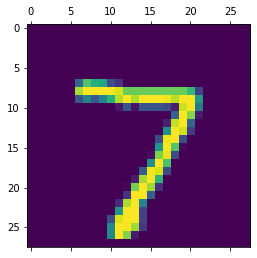

In [23]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [24]:
np.argmax(y_predicted[0]) 

7

In [25]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 4,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 8,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [26]:
y_predicted_labels[:7]

[7, 2, 1, 0, 4, 1, 4]

In [27]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    5,    2,    2,    1],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   4,    8,  929,   19,    7,    4,   10,    8,   38,    5],
       [   2,    0,   17,  931,    1,   20,    2,    8,   20,    9],
       [   1,    1,    3,    1,  914,    0,   11,    3,    9,   39],
       [   7,    3,    2,   42,    9,  777,   11,    4,   30,    7],
       [  10,    3,    8,    1,    7,   14,  910,    2,    3,    0],
       [   1,    6,   24,    9,    9,    1,    0,  932,    2,   44],
       [   4,    7,    8,   25,    9,   24,    7,    6,  875,    9],
       [   9,    7,    1,   12,   26,    5,    0,    8,    8,  933]])>

Text(69.0, 0.5, 'Truth')

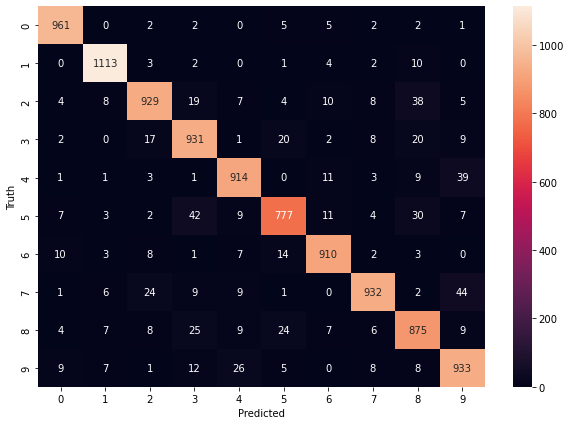

In [30]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [31]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2693 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1195 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0845 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0648 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0524 - accuracy: 0.9837


In [32]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 958us/step - loss: 0.0837 - accuracy: 0.9743


[0.08366327732801437, 0.9743000268936157]

313/313 [==============================] - 0s 788us/step


Text(69.0, 0.5, 'Truth')

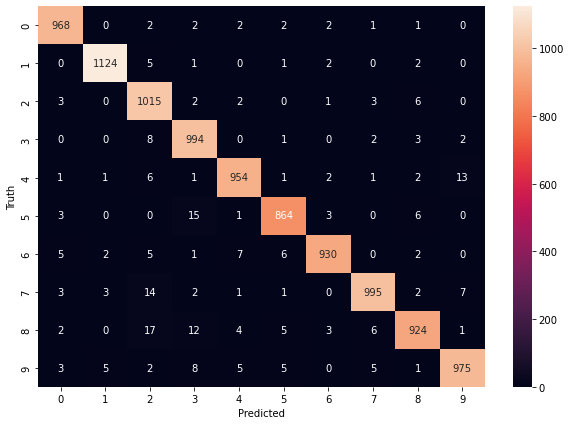

In [33]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2774 - accuracy: 0.9204
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1273 - accuracy: 0.9625
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0889 - accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0679 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0534 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0443 - accuracy: 0.9861
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0361 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0299 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0248 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.020

In [35]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 926us/step - loss: 0.0756 - accuracy: 0.9770


[0.07564112544059753, 0.9769999980926514]